In [1]:
import radial
import angular

In [6]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
radial.Leaver_Cf_trunc_inversion(0.4-0.2j, 0., -2, 2, 4.+0.j, 0, 300, 1.+0.j)

(-3.7832264403820357-1.8368923380529323j)

In [8]:
Npts=100
omegar=np.arange(0.2, .5, .3/Npts)
omegai=np.arange(-0.2, -0., .2/Npts)
Or, Oi = np.meshgrid(omegar, omegai)
Os = Or + 1.j*Oi

In [9]:
leav1 = lambda omega: radial.Leaver_Cf_trunc_inversion(omega, 0., -2, 2, 4.+0.j, 0, 300, 0.j)
leavf = np.vectorize(leav1)
Leavers = np.abs(leavf(Os))

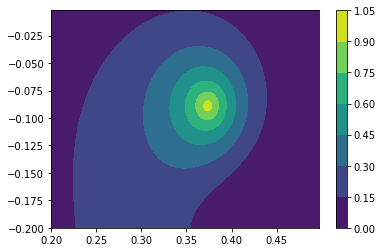

In [10]:
CS = plt.contourf(Or, Oi, np.exp(-Leavers))
plt.colorbar(CS)
plt.show()

In [11]:
angular.sep_const_closest(4., -2, 0.1, 2, 20)

(3.7252106530184745+0j)

In [23]:
Npts=100
omegar=np.arange(0.35, .45, .1/Npts)
omegai=np.arange(-0.15, -0., .15/Npts)
Or, Oi = np.meshgrid(omegar, omegai)
Os = Or + 1.j*Oi

In [24]:
a = 0.2
s = -2
m = 2

n_inv = 2
Nr = 300
r_N = 0.
l_max = 20

leav1 = lambda omega: radial.Leaver_Cf_trunc_inversion(omega, a, s, m, 
                                                       angular.sep_const_closest(4., s, a*omega, m, l_max),
                                                       n_inv, Nr, r_N)
leavf = np.vectorize(leav1)
Leavers = np.abs(leavf(Os))

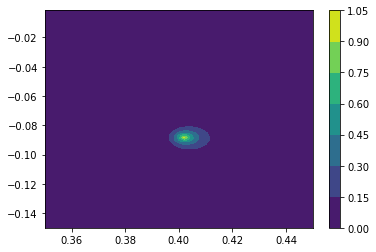

In [27]:
CS = plt.contourf(Or, Oi, np.exp(-Leavers))
plt.colorbar(CS)
plt.show()

In [32]:
from scipy import optimize

In [98]:
a = 0.5
s = -2
m = 2

n_inv = 3
Nr = 300
r_N = 0.
l_max = 20

A0 = 4.

def leavA(x):
    omega = x[0] + 1.j*x[1]
    A = angular.sep_const_closest(A0, s, a*omega, m, l_max)
    Leav_err = radial.Leaver_Cf_trunc_inversion(omega, a, s, m, A, n_inv, Nr, r_N)
    return [np.real(Leav_err), np.imag(Leav_err)]

sol = optimize.root(leavA, [0.4, 0.08], tol=1e-10)
print(sol)
omega_sol = sol.x[0] + 1.j*sol.x[1]
print(omega_sol)

    fjac: array([[-0.91722661, -0.39836584],
       [ 0.39836584, -0.91722661]])
     fun: array([5.40678613e-14, 2.41140441e-13])
 message: 'The solution converged.'
    nfev: 13
     qtf: array([-6.27731530e-10, -9.19897731e-10])
       r: array([-38.67272047,  -0.09025114, -38.46615684])
  status: 1
 success: True
       x: array([ 0.41791282, -0.44296165])
(0.41791281746869824-0.44296164988174275j)


In [99]:
angular.sep_consts(s, a*omega_sol, m, l_max)

array([  3.44807369+0.66621887j,   9.72352054+0.32944044j,
        17.83439067+0.2087013j ,  27.8902988 +0.15193687j,
        39.92235868+0.12064507j,  53.94242625+0.10152497j,
        69.95581388+0.08896951j,  87.96518835+0.08027339j,
       107.97200729+0.07399758j, 129.97712192+0.06931793j,
       153.98105641+0.06573423j, 179.98414785+0.06292833j,
       207.986621  +0.0606899j , 237.98863043+0.05887534j,
       269.99028525+0.0573838j , 303.99166425+0.0561428j ,
       339.99282551+0.05509913j, 377.99380023+0.05421445j,
       417.99413655+0.04477179j])